In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Natures and word embeddings

### Load default natures

In [36]:
df_natures = pd.read_csv('natures.csv', index_col=0)
df_natures

,Attack,Defense,Special Attack,Special Defense,Speed
Nature,,,,,
Hardy,0,0,0,0,0
Lonely,1,-1,0,0,0
Brave,1,0,0,0,-1
Adamant,1,0,-1,0,0
Naughty,1,0,0,-1,0
Bold,-1,1,0,0,0
Docile,0,0,0,0,0
Relaxed,0,1,0,0,-1
Impish,0,1,-1,0,0


### Load other personality traits

In [37]:
''' Scrape traits from http://ideonomy.mit.edu/essays/traits.html '''
traits = []
with open('ideonomy_traits.html', 'r') as f:
    for line in f:
        if '</LI>' == line.strip()[-5:]:
            trait = line.strip()[:-5].lower()
            traits.append(trait)
print('Traits:', len(traits))

Traits: 638


In [38]:
''' Add natures if not already present '''
for nature in df_natures.index:
    if not nature.lower() in traits:
        traits.append(nature.lower())
print('Traits:', len(traits))

Traits: 654


In [39]:
''' Add Myers-Briggs terms for fun '''
mbti = ['introverted', 'extroverted', 'sensing', 'intuitive', 'thinking', 'feeling', 'judging', 'perceiving']
for trait in mbti:
    if not trait in traits:
        traits.append(trait.lower())
print('Traits:', len(traits))

Traits: 661


### Load GloVe embeddings for selected traits

In [40]:
embeddings_dict = {}
with open('D:\Datasets\GloVe\glove.6B.50d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        if word in traits: # only load embeddings for selected words
            embeddings_dict[word] = vector
        if len(embeddings_dict) == len(traits): # stop when all traits are loaded
            break
            
df_embeddings = pd.DataFrame.from_dict(embeddings_dict, orient='index')
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
political,-0.184870,0.35358,-0.292940,0.059937,0.32308,0.467640,0.419200,-0.059661,-0.82141,-0.034290,...,-0.683650,0.46017,-0.656180,0.542130,-0.31278,-0.14890,-0.589830,0.59261,0.024439,-0.402340
open,-0.062761,0.81904,-0.067769,1.072800,-0.48884,-0.536590,-0.395120,0.296840,-0.24994,-0.646160,...,0.229490,-0.73993,0.900410,0.468830,0.45120,0.66440,0.249310,-0.88062,-0.042584,-0.218270
strong,-0.284860,0.15815,0.044641,0.074495,0.62572,0.327290,0.011979,0.054972,-0.23145,0.669810,...,-0.158330,0.32317,-0.366850,-0.386410,0.59325,0.19611,-0.317820,0.53302,-0.157750,0.234560
private,0.920550,0.48265,0.145660,-0.246940,0.21057,-0.168370,-1.244600,-0.162540,0.17945,-0.226900,...,0.130770,-0.37693,0.350190,0.800150,-0.25888,-0.72938,-1.294800,0.11505,0.123180,0.429610
popular,-0.140420,0.60235,-0.506200,0.297880,-0.59072,0.268720,-1.339500,-0.848190,-0.56342,1.006900,...,0.061746,0.65986,-0.720960,0.048026,0.40668,0.19201,-0.850270,-0.47131,0.640340,-0.168690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uncreative,-0.331870,-1.04000,-0.306330,-0.568080,-0.24761,-0.176670,0.683530,0.400930,-0.72711,0.280110,...,-0.394850,-0.51198,-0.025045,0.572080,0.13395,-0.43594,0.057728,0.18715,0.063991,0.340690
unaggressive,-0.342210,-1.25950,-0.573770,-0.148320,-0.38310,-0.072113,0.493100,0.333280,0.48026,0.848120,...,-0.453460,-0.53936,0.067763,0.352130,0.48838,-0.60118,0.657730,0.48150,-0.313730,-0.027838
many-sided,-0.186880,-0.30673,-0.680990,0.155010,0.57385,0.169720,0.452480,0.202010,0.66714,0.040706,...,0.259420,-0.45574,-0.909520,0.280570,0.41767,-0.90217,0.770320,0.60725,-0.345910,0.023293
self-denying,-0.750330,-1.59560,-0.612780,-0.435640,-0.81429,0.093084,0.099416,-0.534750,0.65424,0.463260,...,-0.949280,-1.00310,-0.323060,0.924110,-0.58454,-0.15280,-0.337980,-0.39539,1.387800,-0.398330


### Check that missed words are either non-essential or typos in the ideonomy file

In [41]:
for trait in traits:
    if not trait in df_embeddings.index:
        print(trait)

allocentric
anticipative
clear-headed
companionly
felicific
forecful
herioc
leaderly
masculine&nbsp; (manly)
maticulous
multi-leveled
nonauthoritarian
planful
pruposeful
self-defacing
self-sufficent
teacherly
unfoolable
absentminded
big-thinking
crebral
huried
old-fashined
stoiid
unpredicatable
unreligious
arrogantt
astigmatic
biosterous
cantakerous
complaintive
distractible
easily discouraged
mannerless
mealymouthed
money-minded
muddle-headed
negativistic
overimaginative
pharissical
small-thinking
softheaded
thievish
unself-critical


# 2. PCA biplot of embeddings for original natures

In [42]:
df_nat_embeddings = df_embeddings.loc[df_natures.index.map(lambda x: x.lower()),:]
df_nat_embeddings

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Nature,,,,,,,,,,,,,,,,,,,,,
hardy,-0.003843,0.487330,-0.170270,0.048426,0.186190,0.232510,-0.611740,-0.232030,-0.204540,-0.338350,...,0.142350,0.137270,-0.093408,-0.347970,0.883440,0.105290,-0.182750,-1.167700,-0.911000,0.953140
lonely,0.292980,0.505250,-0.006351,-0.698390,0.500210,-0.063788,-0.701830,0.927640,-0.055924,-0.055512,...,-0.229480,-0.556370,0.087359,0.275150,0.354150,-0.088872,-0.130740,-1.350600,-0.253260,0.626750
brave,0.069929,-0.152740,-0.147990,-0.652830,0.702980,-0.489950,0.242770,0.734510,-0.420550,0.243970,...,0.064472,-0.455280,0.325870,-0.051338,0.836250,0.149910,-0.409080,-0.617000,-0.102960,0.438700
adamant,0.135450,-0.585980,-0.210210,-0.614060,0.279380,0.057485,-0.012031,0.947350,-0.608530,0.226660,...,0.244520,-0.420750,-0.005261,0.463660,0.147800,0.055583,-1.005800,0.891490,-0.244910,0.214270
naughty,-0.043296,-0.769070,-0.956510,-0.416470,0.213550,0.521690,-0.246860,-0.532670,-0.524860,0.682020,...,0.301170,-0.502120,0.029554,0.512490,0.694400,0.293210,0.677410,-0.179620,0.525300,0.700180
bold,0.196750,0.295600,-0.420740,-0.288690,0.071723,0.002931,0.207010,-0.599380,-1.001500,0.536270,...,0.310830,-0.318710,-0.234560,-0.437900,0.523050,-0.136040,0.407640,0.537510,0.751740,0.507730
docile,0.235070,-1.266600,-0.918530,-0.484660,0.697150,-0.168370,0.262690,0.436990,-0.286500,0.274270,...,-0.269280,-0.015876,-0.295570,1.566800,0.251790,-0.203610,-0.671530,-0.139620,0.277710,0.395140
relaxed,-0.792130,-0.448940,-1.298600,-0.436840,0.065239,-0.927270,0.026897,-0.084128,-0.767790,0.305210,...,-0.394940,0.105680,0.324630,0.937760,-0.061452,-0.648180,-0.012556,-0.263940,0.245930,0.712620
impish,0.049523,0.286940,-0.643000,-0.556620,0.882260,0.321580,0.739790,-0.243510,-0.519440,1.441900,...,0.865370,0.800100,-0.646750,0.481140,0.392580,-0.745180,0.801720,0.465360,0.311380,-0.088780


In [63]:
import sklearn.decomposition

X = df_nat_embeddings.values
pca = sklearn.decomposition.PCA()
top2pcs = pca.fit_transform(X)[:,:2]
top2var = pca.explained_variance_ratio_[:2]
df_biplot = pd.DataFrame(index=df_nat_embeddings.index, columns=['PC1','PC2'], data=top2pcs)

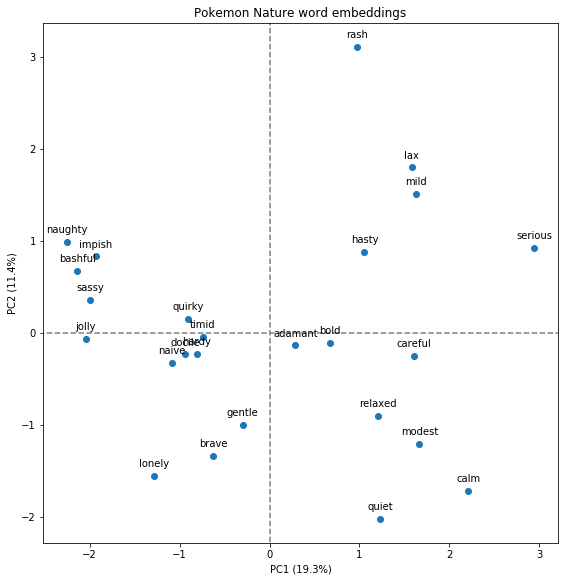

In [82]:
''' Basic labeled PCA biplot '''
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(df_biplot['PC1'], df_biplot['PC2'])
ax.set_xlabel('PC1 (' + str(round(100*top2var[0],1)) + '%)')
ax.set_ylabel('PC2 (' + str(round(100*top2var[1],1)) + '%)')
ax.axvline(x=0, ymin=np.min(top2pcs[:,1]), ymax=np.max(top2pcs[:,1]), color='gray', ls='--')
ax.axhline(y=0, xmin=np.min(top2pcs[:,0]), xmax=np.max(top2pcs[:,0]), color='gray', ls='--')

for i,nature in enumerate(df_nat_embeddings.index):
    x = top2pcs[i,0]
    y = top2pcs[i,1]
    ax.text(x,y+0.1,nature,ha='center')
plt.tight_layout()

plt.title('Pokemon Nature word embeddings')
plt.savefig('figures/nature_biplot.png', format='png', dpi=90, bbox_inches='tight')

In [65]:
''' Bin natures by bonus/malus '''
bonuses = {}; maluses = {}
for stat in df_natures.columns:
    df_bonus = df_natures[df_natures.loc[:,stat] == 1]
    df_malus = df_natures[df_natures.loc[:,stat] == -1]
    bonuses[stat] = df_bonus.index.map(lambda x: x.lower()).tolist()
    maluses[stat] = df_malus.index.map(lambda x: x.lower()).tolist()
bonuses['Neutral'] = ['hardy', 'docile', 'serious', 'bashful', 'quirky']
maluses['Neutral'] = ['hardy', 'docile', 'serious', 'bashful', 'quirky']

print(bonuses)
print(maluses)

{'Attack': ['lonely', 'brave', 'adamant', 'naughty'], 'Defense': ['bold', 'relaxed', 'impish', 'lax'], 'Special Attack': ['modest', 'mild', 'quiet', 'rash'], 'Special Defense': ['calm', 'gentle', 'sassy', 'careful'], 'Speed': ['timid', 'hasty', 'jolly', 'naive'], 'Neutral': ['hardy', 'docile', 'serious', 'bashful', 'quirky']}
{'Attack': ['bold', 'timid', 'modest', 'calm'], 'Defense': ['lonely', 'hasty', 'mild', 'gentle'], 'Special Attack': ['adamant', 'impish', 'jolly', 'careful'], 'Special Defense': ['naughty', 'lax', 'naive', 'rash'], 'Speed': ['brave', 'relaxed', 'quiet', 'sassy'], 'Neutral': ['hardy', 'docile', 'serious', 'bashful', 'quirky']}


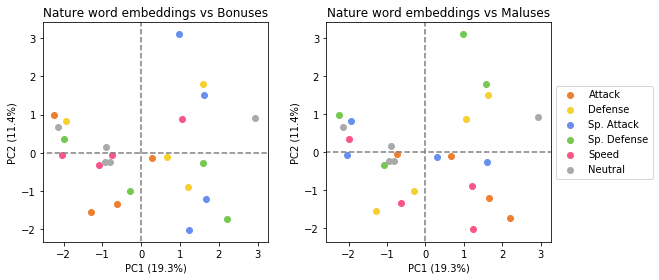

In [81]:
''' PCA biplot colors by stat bonuses and maluses '''

fig, axs = plt.subplots(1,2,figsize=(8,4))

colors = ['#EE7F30', '#F7CF2F', '#688FEE', '#77C850', '#F85687', '#AAAAAA']
for i,stat in enumerate(['Attack','Defense','Special Attack', 'Special Defense', 'Speed', 'Neutral']):
    color = colors[i]
    stat_label = stat.replace('Special', 'Sp.')
    axs[0].scatter(df_biplot.loc[bonuses[stat],'PC1'], df_biplot.loc[bonuses[stat],'PC2'], color=color, label=stat_label)
    axs[1].scatter(df_biplot.loc[maluses[stat],'PC1'], df_biplot.loc[maluses[stat],'PC2'], color=color, label=stat_label)
  
for ax in axs:
    ax.set_xlabel('PC1 (' + str(round(100*top2var[0],1)) + '%)')
    ax.set_ylabel('PC2 (' + str(round(100*top2var[1],1)) + '%)')
    ax.axvline(x=0, ymin=np.min(top2pcs[:,1]), ymax=np.max(top2pcs[:,1]), color='gray', ls='--')
    ax.axhline(y=0, xmin=np.min(top2pcs[:,0]), xmax=np.max(top2pcs[:,0]), color='gray', ls='--')

axs[0].set_title('Nature word embeddings vs Bonuses')
axs[1].set_title('Nature word embeddings vs Maluses')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('figures/nature_biplot_colored.png', format='png', dpi=90, bbox_inches='tight')